# Clustering (k-means, hierarchical)

In this project, Iris Data Set clustering was carried out using K-Means methods and hierarchical clustering.

## Loading data 

In [2]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('iris.csv', header=None) 
no_labeled_data = data.iloc[:,[0,1,2,3]].values

no_labeled_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Clustering data using KMeans

In [3]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15).fit(no_labeled_data)

In [4]:
from sklearn.metrics.pairwise import pairwise_distances_argmin 
k_means_cluster_centers = k_means.cluster_centers_ 
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

Classification results for signs in pairs.

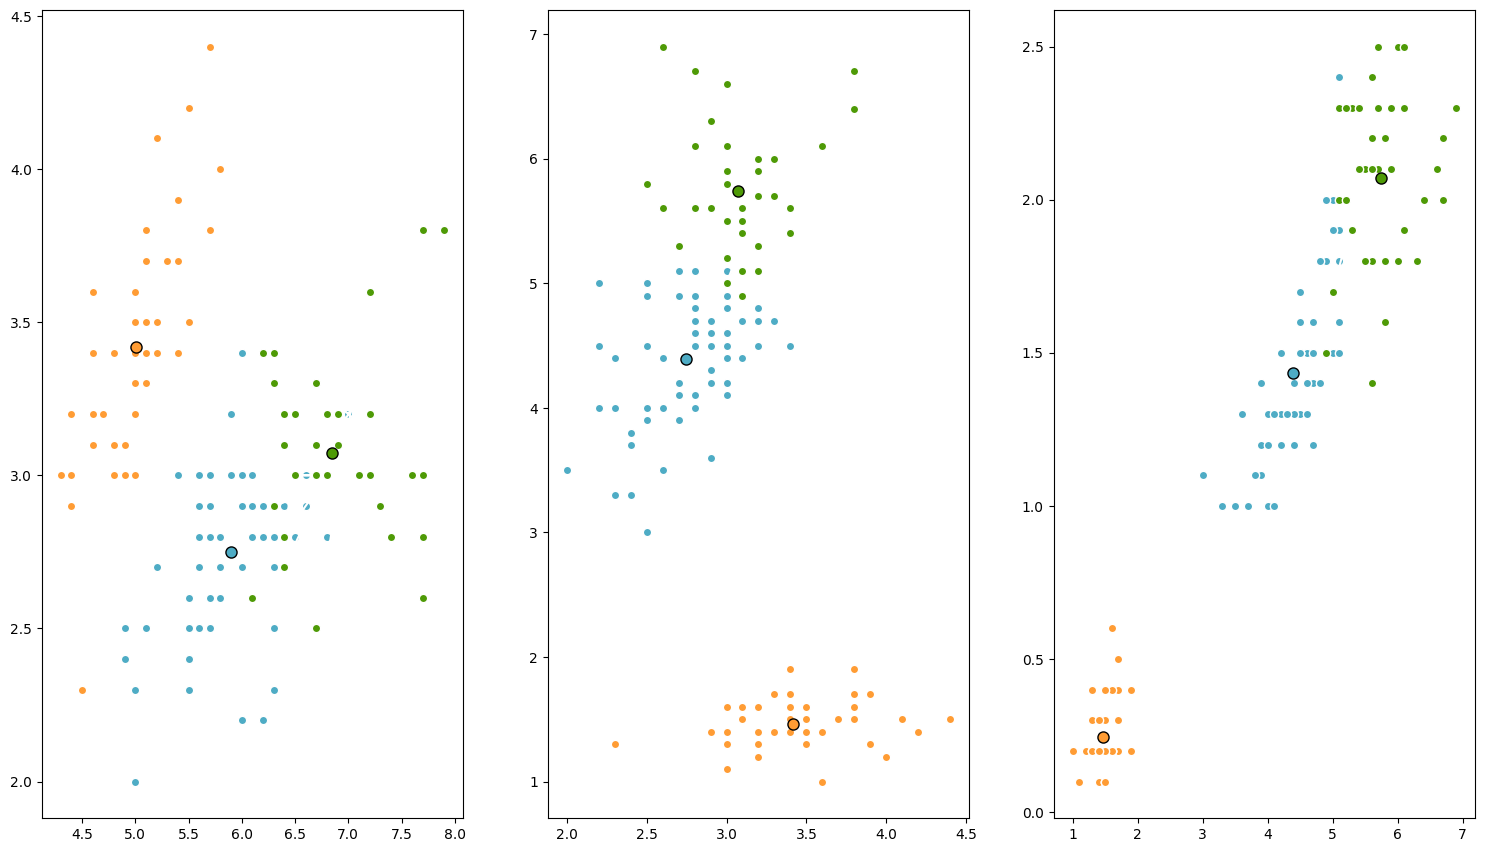

In [5]:
import matplotlib.pyplot as plt 

f, ax = plt.subplots(1, 3) 
colors = ['#4EACC5', '#FF9C34', '#4E9A06'] 
f.set_size_inches(18.5, 10.5) 
X = no_labeled_data 

for i in range(3): 
    my_members = k_means_labels == i 
    cluster_center = k_means_cluster_centers[i] 
    for j in range(3): 
        ax[j].plot(X[my_members, j], 
                   X[my_members, j+1], 
                   'w', 
                   markerfacecolor=colors[i], 
                   marker='o', 
                   markersize=6) 
        
        ax[j].plot(cluster_center[j], 
                   cluster_center[j+1], 
                   'o', 
                   markerfacecolor=colors[i], 
                   markeredgecolor='k', 
                   markersize=8) 
        
plt.show()

Change the dimention of data to 2, using the head component method and draw a map for all areas of significance, for which skin cluster occupies the same area with its own color.

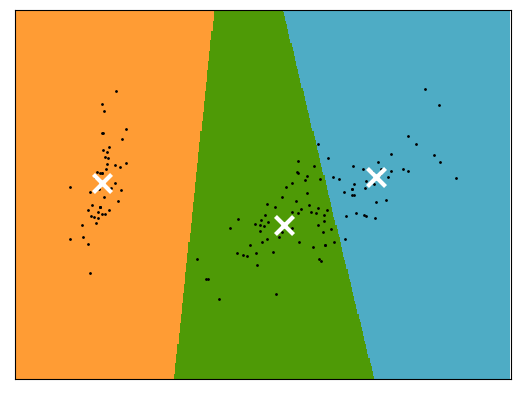

In [7]:
from sklearn.decomposition import PCA
import matplotlib.colors

colors = ['#4EACC5', '#FF9C34', '#4E9A06'] 
my_cmap = matplotlib.colors.ListedColormap(colors)

reduced_data = PCA(n_components = 2).fit_transform(no_labeled_data)
kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init = 1)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=my_cmap, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker="x", s=169, linewidths=3,
            color="w", zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Determine the best number of clusters using the "elbow method".

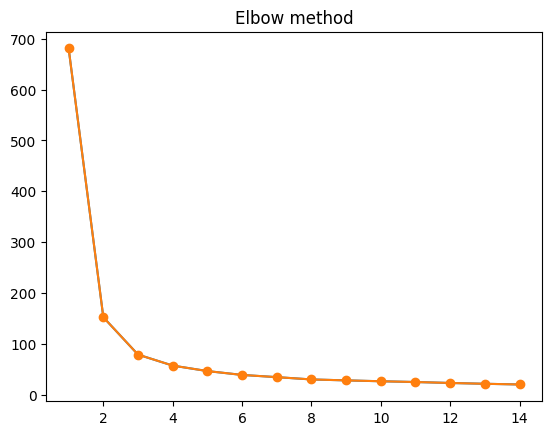

In [8]:
points = []

for i in range(1, 15):
    kmean = KMeans(n_clusters = i, init = "k-means++")
    kmean.fit_predict(no_labeled_data)
    points.append(kmean.inertia_)

plt.plot(range(1, 15), points)
plt.plot(range(1, 15), points, marker='o')

plt.title('Elbow method')
plt.show()

## Hierarchical clustering

We will perform hierarchical clustering on the same data. Let's display the clustering results.

In [10]:
from sklearn.cluster import AgglomerativeClustering 
hier = AgglomerativeClustering(n_clusters = 3, linkage = 'average') 
hier = hier.fit(no_labeled_data) 
hier_labels = hier.labels_

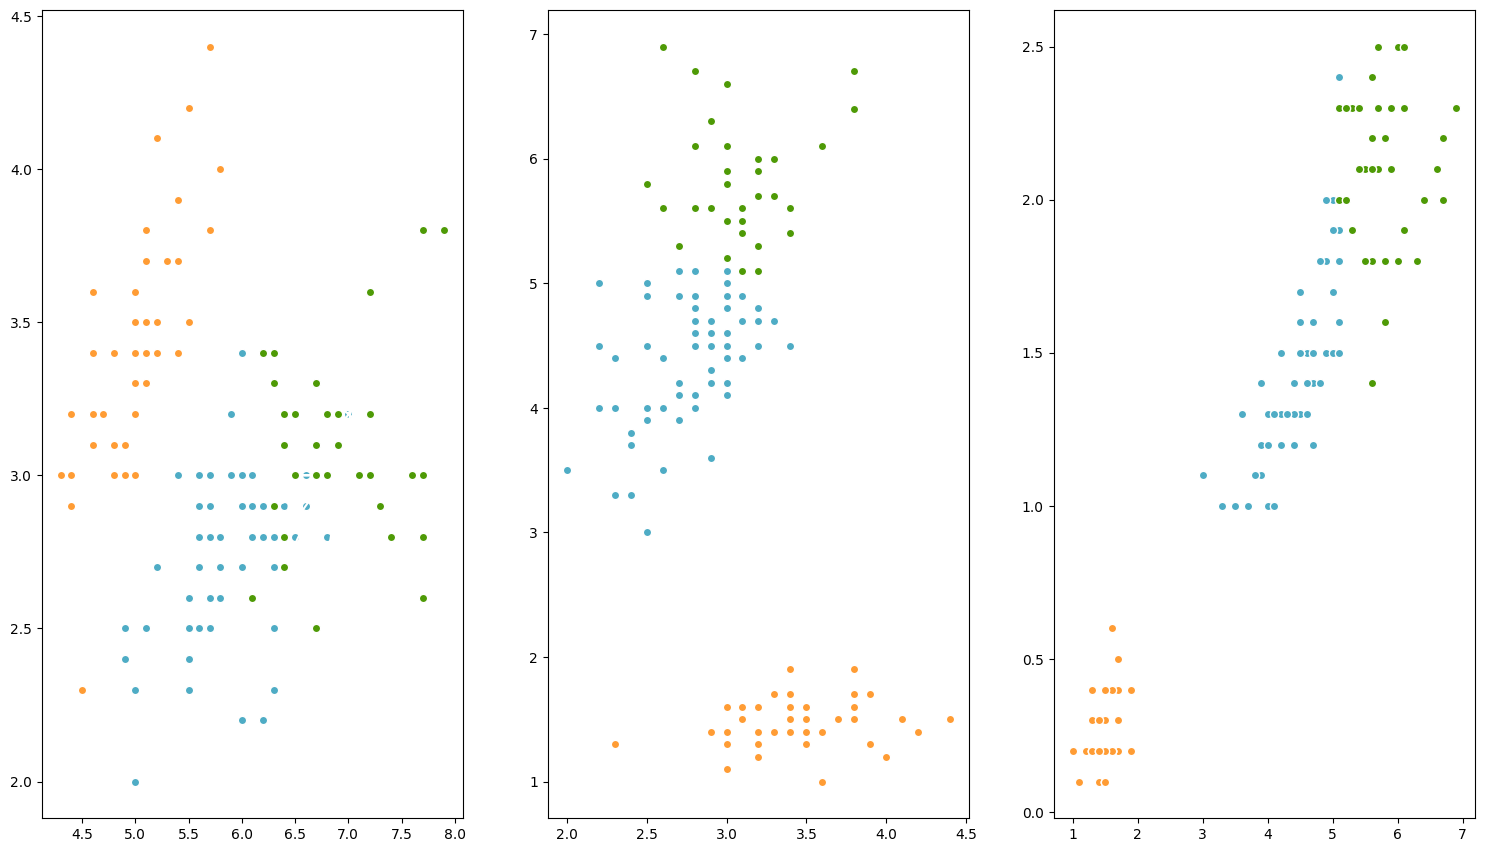

In [11]:
f, ax = plt.subplots(1, 3) 
f.set_size_inches(18.5, 10.5) 

X = no_labeled_data 

for i in range(3): 
    my_members = hier_labels == i 
    
    for j in range(3): 
        ax[j].plot(X[my_members, j], 
                   X[my_members, j+1], 
                   'w', 
                   markerfacecolor=colors[i], 
                   marker='o', 
                   markersize=6) 
        
plt.show()

Let's build a dendogram up to level 4.

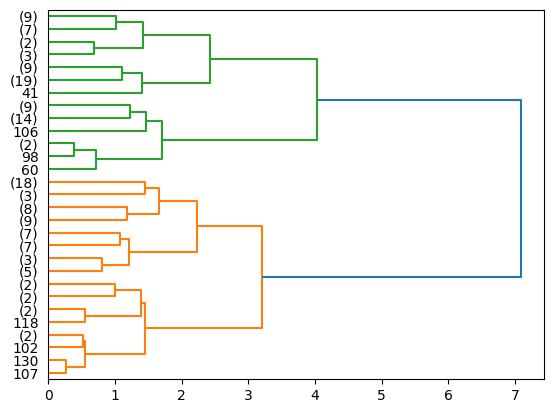

In [14]:
from scipy.cluster import hierarchy

dendr = hierarchy.linkage(no_labeled_data, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z = dendr, truncate_mode = 'level', p = 4, orientation = 'right')